In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from IPython import display
from scipy.signal import savgol_filter

In [2]:
df = pd.read_csv('/content/Dataset.csv')

In [3]:
df.head()

,X,Y,LABEL
0,87,83,2
1,92,27,1
2,58,91,2
3,78,65,2
4,82,89,2


In [4]:
X1 = df["X"].values.tolist()
X2 = df["Y"].values.tolist()
Y = df["LABEL"].values.tolist()

In [5]:
X = df[['X', 'Y']].values / 100.0
Y = df['LABEL'].values

In [6]:
Y_onehot = np.zeros((len(Y), 3))
Y_onehot[np.arange(len(Y)), Y] = 1

In [7]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        outLayerNeurons = 3

        self.learning_rate = 0.05
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(hidden_input)

        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.softmax(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)

        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)

    def train(self, X, Y):
        pred = self.feedForward(X)
        self.backPropagation(X, Y, pred)
        return pred


In [16]:
NN = NeuralNetwork()
err = []

for i in range(10000):
    pred = NN.train(X, Y_onehot)
    loss = np.mean(np.square(Y_onehot - pred))
    err.append(loss)
    if i % 500 == 0:
        print(f"Epoch {i}: Loss = {loss:.4f}")

Epoch 0: Loss = 0.4168
Epoch 500: Loss = 0.0136
Epoch 1000: Loss = 0.0104
Epoch 1500: Loss = 0.0091
Epoch 2000: Loss = 0.0085
Epoch 2500: Loss = 0.0080
Epoch 3000: Loss = 0.0077
Epoch 3500: Loss = 0.0074
Epoch 4000: Loss = 0.0071
Epoch 4500: Loss = 0.0068
Epoch 5000: Loss = 0.0064
Epoch 5500: Loss = 0.0060
Epoch 6000: Loss = 0.0056
Epoch 6500: Loss = 0.0053
Epoch 7000: Loss = 0.0050
Epoch 7500: Loss = 0.0047
Epoch 8000: Loss = 0.0045
Epoch 8500: Loss = 0.0044
Epoch 9000: Loss = 0.0043
Epoch 9500: Loss = 0.0042


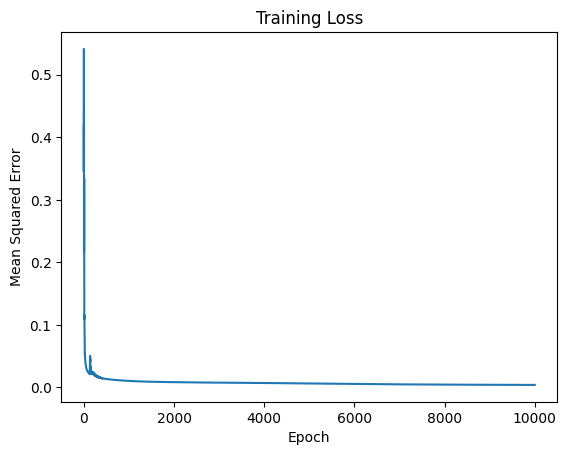

In [17]:
plt.plot(err)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.show()